In [1]:
import sys
sys.path.insert(1, '..')
import game_utils as gu
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
games_with_info_df = pd.read_csv('../../data/games/all_games_with_info.csv')
games_with_info_df.head()

,date,year,week,team,team_score,opponent,opponent_score,win,home,temperature,wind,humidity,roof,surface
0,2010-09-09,2010,1,New Orleans Saints,14,Minnesota Vikings,9,1,1,NaN,NaN,NaN,dome,sportturf
1,2010-09-09,2010,1,Minnesota Vikings,9,New Orleans Saints,14,0,0,NaN,NaN,NaN,dome,sportturf
2,2010-09-12,2010,1,Chicago Bears,19,Detroit Lions,14,1,1,75.0,10.0,45.0,outdoors,grass
3,2010-09-12,2010,1,Detroit Lions,14,Chicago Bears,19,0,0,75.0,10.0,45.0,outdoors,grass
4,2010-09-12,2010,1,Buffalo Bills,10,Miami Dolphins,15,0,1,62.0,7.0,81.0,outdoors,astroplay


In [8]:
home_games_df = games_with_info_df[games_with_info_df['home'] == True]

In [12]:
perc_home_wins = home_games_df['win'].sum() / len(home_games_df['win']) * 100
perc_home_wins

56.049754994346024

In [19]:
samp_df = home_games_df[home_games_df['home'] == True][['year', 'win']]
samp_df


,year,win
0,2010,1
2,2010,1
4,2010,0
6,2010,1
8,2010,1
...,...,...
5296,2020,0
5298,2020,0
5300,2020,0
5302,2020,1


In [24]:
win_perc_year_df = samp_df.groupby('year').sum() / samp_df.groupby('year').count() * 100
win_perc_year_df

,win
year,
2010,56.962025
2011,57.201646
2012,57.692308
2013,59.583333
2014,57.142857
2015,53.191489
2016,58.436214
2017,55.785124
2018,59.336100


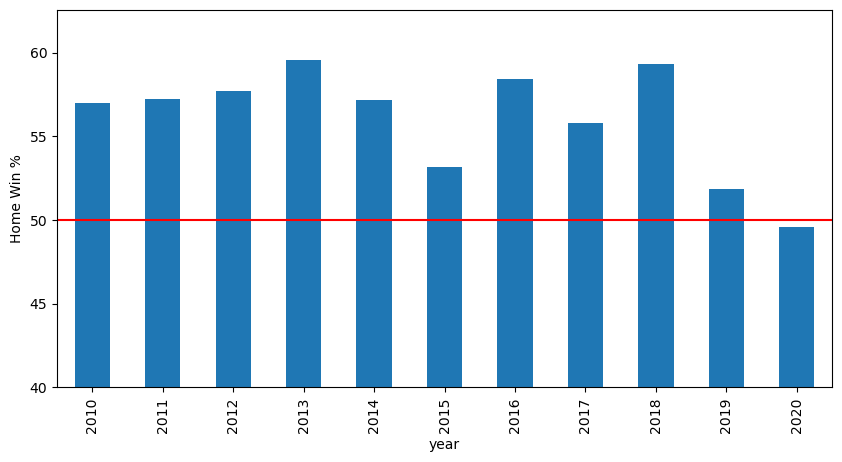

In [42]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
win_perc_year_df.plot(kind='bar', legend=None, ax=ax)
plt.axhline(y=50, color='r', linestyle='-')
plt.ylim(bottom=40)
plt.ylabel('Home Win %');